In [1]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np
np.random.seed(42)
# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams['font.size'] = 16
matplotlib.rcParams['figure.figsize'] = (9, 9)
import matplotlib.gridspec as gridspec
import matplotlib.pylab as pl

import seaborn as sns

from IPython.core.pylabtools import figsize

# Scipy helper functions
from scipy.stats import percentileofscore
from scipy import stats
# Standard ML Models for comparison
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# Splitting data into training/testing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error

# Distributions
import scipy
import warnings
warnings.filterwarnings('ignore')

# PyMC3 for Bayesian Inference
import pymc3 as pm

In [2]:
raw_df = pd.read_csv('student/student-mat.csv', delimiter=';')
raw_df2 = pd.read_csv('student/student-por.csv', delimiter=';')

In [3]:
frames = [raw_df,raw_df2]

In [4]:
df = pd.concat(frames)

In [5]:
df.to_csv('combined_raw.csv')

In [10]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [58]:
df.G3.value_counts()

10    153
11    151
13    113
12    103
14     90
15     82
8      67
9      63
0      53
16     52
17     35
18     27
7      19
6      18
5       8
19      7
4       1
1       1
20      1
Name: G3, dtype: int64

In [59]:
#drop students witch final grade of 0
df = df[~df.G3.isin([0,1])]

In [60]:
df.shape

(990, 33)

In [61]:
df = df.rename(columns={'G3': 'Grade'})

In [5]:
# https://en.wikipedia.org/wiki/Covariance_matrix
df.cov()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
age,1.608488,-0.194245,-0.190492,0.092862,0.000472,0.231517,0.074403,0.003706,0.177132,0.165683,0.198470,-0.088401,2.238575,-0.126192,-0.631739,-0.574639
Medu,-0.194245,1.196834,0.721556,-0.133455,0.050751,-0.157768,-0.006381,0.019647,0.093137,0.006161,-0.069863,-0.067195,0.680074,0.611321,0.699926,0.672017
Fedu,-0.190492,0.721556,1.175526,-0.137971,-0.025824,-0.190964,-0.009159,-0.025470,0.050231,-0.018766,-0.026556,0.013880,0.079431,0.571806,0.609787,0.555778
traveltime,0.092862,-0.133455,-0.137971,0.470698,-0.054693,0.059429,-0.014320,-0.005508,0.027814,0.097323,0.123871,0.001267,0.025997,-0.192168,-0.236561,-0.220974
studytime,0.000472,0.050751,-0.025824,-0.054693,0.692050,-0.073246,0.038405,-0.128364,-0.043457,-0.152913,-0.266736,-0.084931,-0.507719,0.379119,0.313545,0.340289
failures,0.231517,-0.157768,-0.190964,0.059429,-0.073246,0.451248,-0.004642,0.070477,0.094074,0.103673,0.151512,0.044228,0.815441,-0.657539,-0.637019,-0.637105
famrel,0.074403,-0.006381,-0.009159,-0.014320,0.038405,-0.004642,0.784503,0.120629,0.029687,-0.064796,-0.145257,0.134226,-0.421167,0.028940,-0.014785,0.107812
freetime,0.003706,0.019647,-0.025470,-0.005508,-0.128364,0.070477,0.120629,1.023337,0.312844,0.194859,0.173913,0.122714,-0.583861,0.017798,-0.049303,-0.070492
goout,0.177132,0.093137,0.050231,0.027814,-0.043457,0.094074,0.029687,0.312844,1.189800,0.282716,0.627616,-0.014651,0.505398,-0.532056,-0.532441,-0.624532
Dalc,0.165683,0.006161,-0.018766,0.097323,-0.152913,0.103673,-0.064796,0.194859,0.282716,0.846190,0.768247,0.114673,0.789255,-0.383698,-0.369276,-0.417737


"Pandas dataframe.corr() is used to find the pairwise correlation of all columns in the dataframe. Any na values are automatically excluded. For any non-numeric data type columns in the dataframe it is ignored."-Shubham__Ranjan https://www.geeksforgeeks.org/python-pandas-dataframe-corr/

In [6]:
df.corr()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
age,1.000000,-0.139999,-0.138532,0.106723,0.000447,0.271748,0.066234,0.002889,0.128041,0.142015,0.120844,-0.049694,0.215578,-0.030706,-0.158273,-0.140372
Medu,-0.139999,1.000000,0.608327,-0.177805,0.055764,-0.214681,-0.006585,0.017753,0.078049,0.006122,-0.049314,-0.043790,0.075924,0.172444,0.203288,0.190308
Fedu,-0.138532,0.608327,1.000000,-0.185481,-0.028631,-0.262197,-0.009537,-0.023222,0.042474,-0.018816,-0.018914,0.009127,0.008948,0.162752,0.178706,0.158811
traveltime,0.106723,-0.177805,-0.185481,1.000000,-0.095827,0.128950,-0.023566,-0.007936,0.037167,0.154209,0.139424,0.001316,0.004628,-0.086438,-0.109559,-0.099785
studytime,0.000447,0.055764,-0.028631,-0.095827,1.000000,-0.131072,0.052122,-0.152533,-0.047891,-0.199821,-0.247601,-0.072786,-0.074541,0.140638,0.119759,0.126728
failures,0.271748,-0.214681,-0.262197,0.128950,-0.131072,1.000000,-0.007802,0.103712,0.128388,0.167774,0.174172,0.046940,0.148261,-0.302071,-0.301316,-0.293831
famrel,0.066234,-0.006585,-0.009537,-0.023566,0.052122,-0.007802,1.000000,0.134631,0.030728,-0.079527,-0.126642,0.108042,-0.058076,0.010083,-0.005304,0.037711
freetime,0.002889,0.017753,-0.023222,-0.007936,-0.152533,0.103712,0.134631,1.000000,0.283519,0.209400,0.132759,0.086485,-0.070492,0.005429,-0.015486,-0.021589
goout,0.128041,0.078049,0.042474,0.037167,-0.047891,0.128388,0.030728,0.283519,1.000000,0.281761,0.444320,-0.009576,0.056590,-0.150527,-0.155100,-0.177383
Dalc,0.142015,0.006122,-0.018816,0.154209,-0.199821,0.167774,-0.079527,0.209400,0.281761,1.000000,0.644920,0.088875,0.104791,-0.128721,-0.127554,-0.140690


In [7]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:
- 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- 2 sex - student's sex (binary: 'F' - female or 'M' - male)
- 3 age - student's age (numeric: from 15 to 22)
- 4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
- 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
- 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- 16 schoolsup - extra educational support (binary: yes or no)
- 17 famsup - family educational support (binary: yes or no)
- 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- 19 activities - extra-curricular activities (binary: yes or no)
- 20 nursery - attended nursery school (binary: yes or no)
- 21 higher - wants to take higher education (binary: yes or no)
- 22 internet - Internet access at home (binary: yes or no)
- 23 romantic - with a romantic relationship (binary: yes or no)
- 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- 29 health - current health status (numeric: from 1 - very bad to 5 - very good)
- 30 absences - number of school absences (numeric: from 0 to 93)

# these grades are related with the course subject, Math or Portuguese:
- 31 G1 - first period grade (numeric: from 0 to 20)
- 31 G2 - second period grade (numeric: from 0 to 20)
- 32 G3 - final grade (numeric: from 0 to 20, output target)

In [8]:
df.shape

(357, 33)

In [62]:
# Correlations of numerical values to final grade (target variable)
df.corr()['Grade'].sort_values()

failures     -0.347400
absences     -0.222513
Walc         -0.184069
Dalc         -0.172465
goout        -0.130908
traveltime   -0.105965
health       -0.090250
age          -0.079651
freetime     -0.075042
famrel        0.056938
Fedu          0.171836
studytime     0.190791
Medu          0.225464
G1            0.880554
G2            0.952330
Grade         1.000000
Name: Grade, dtype: float64

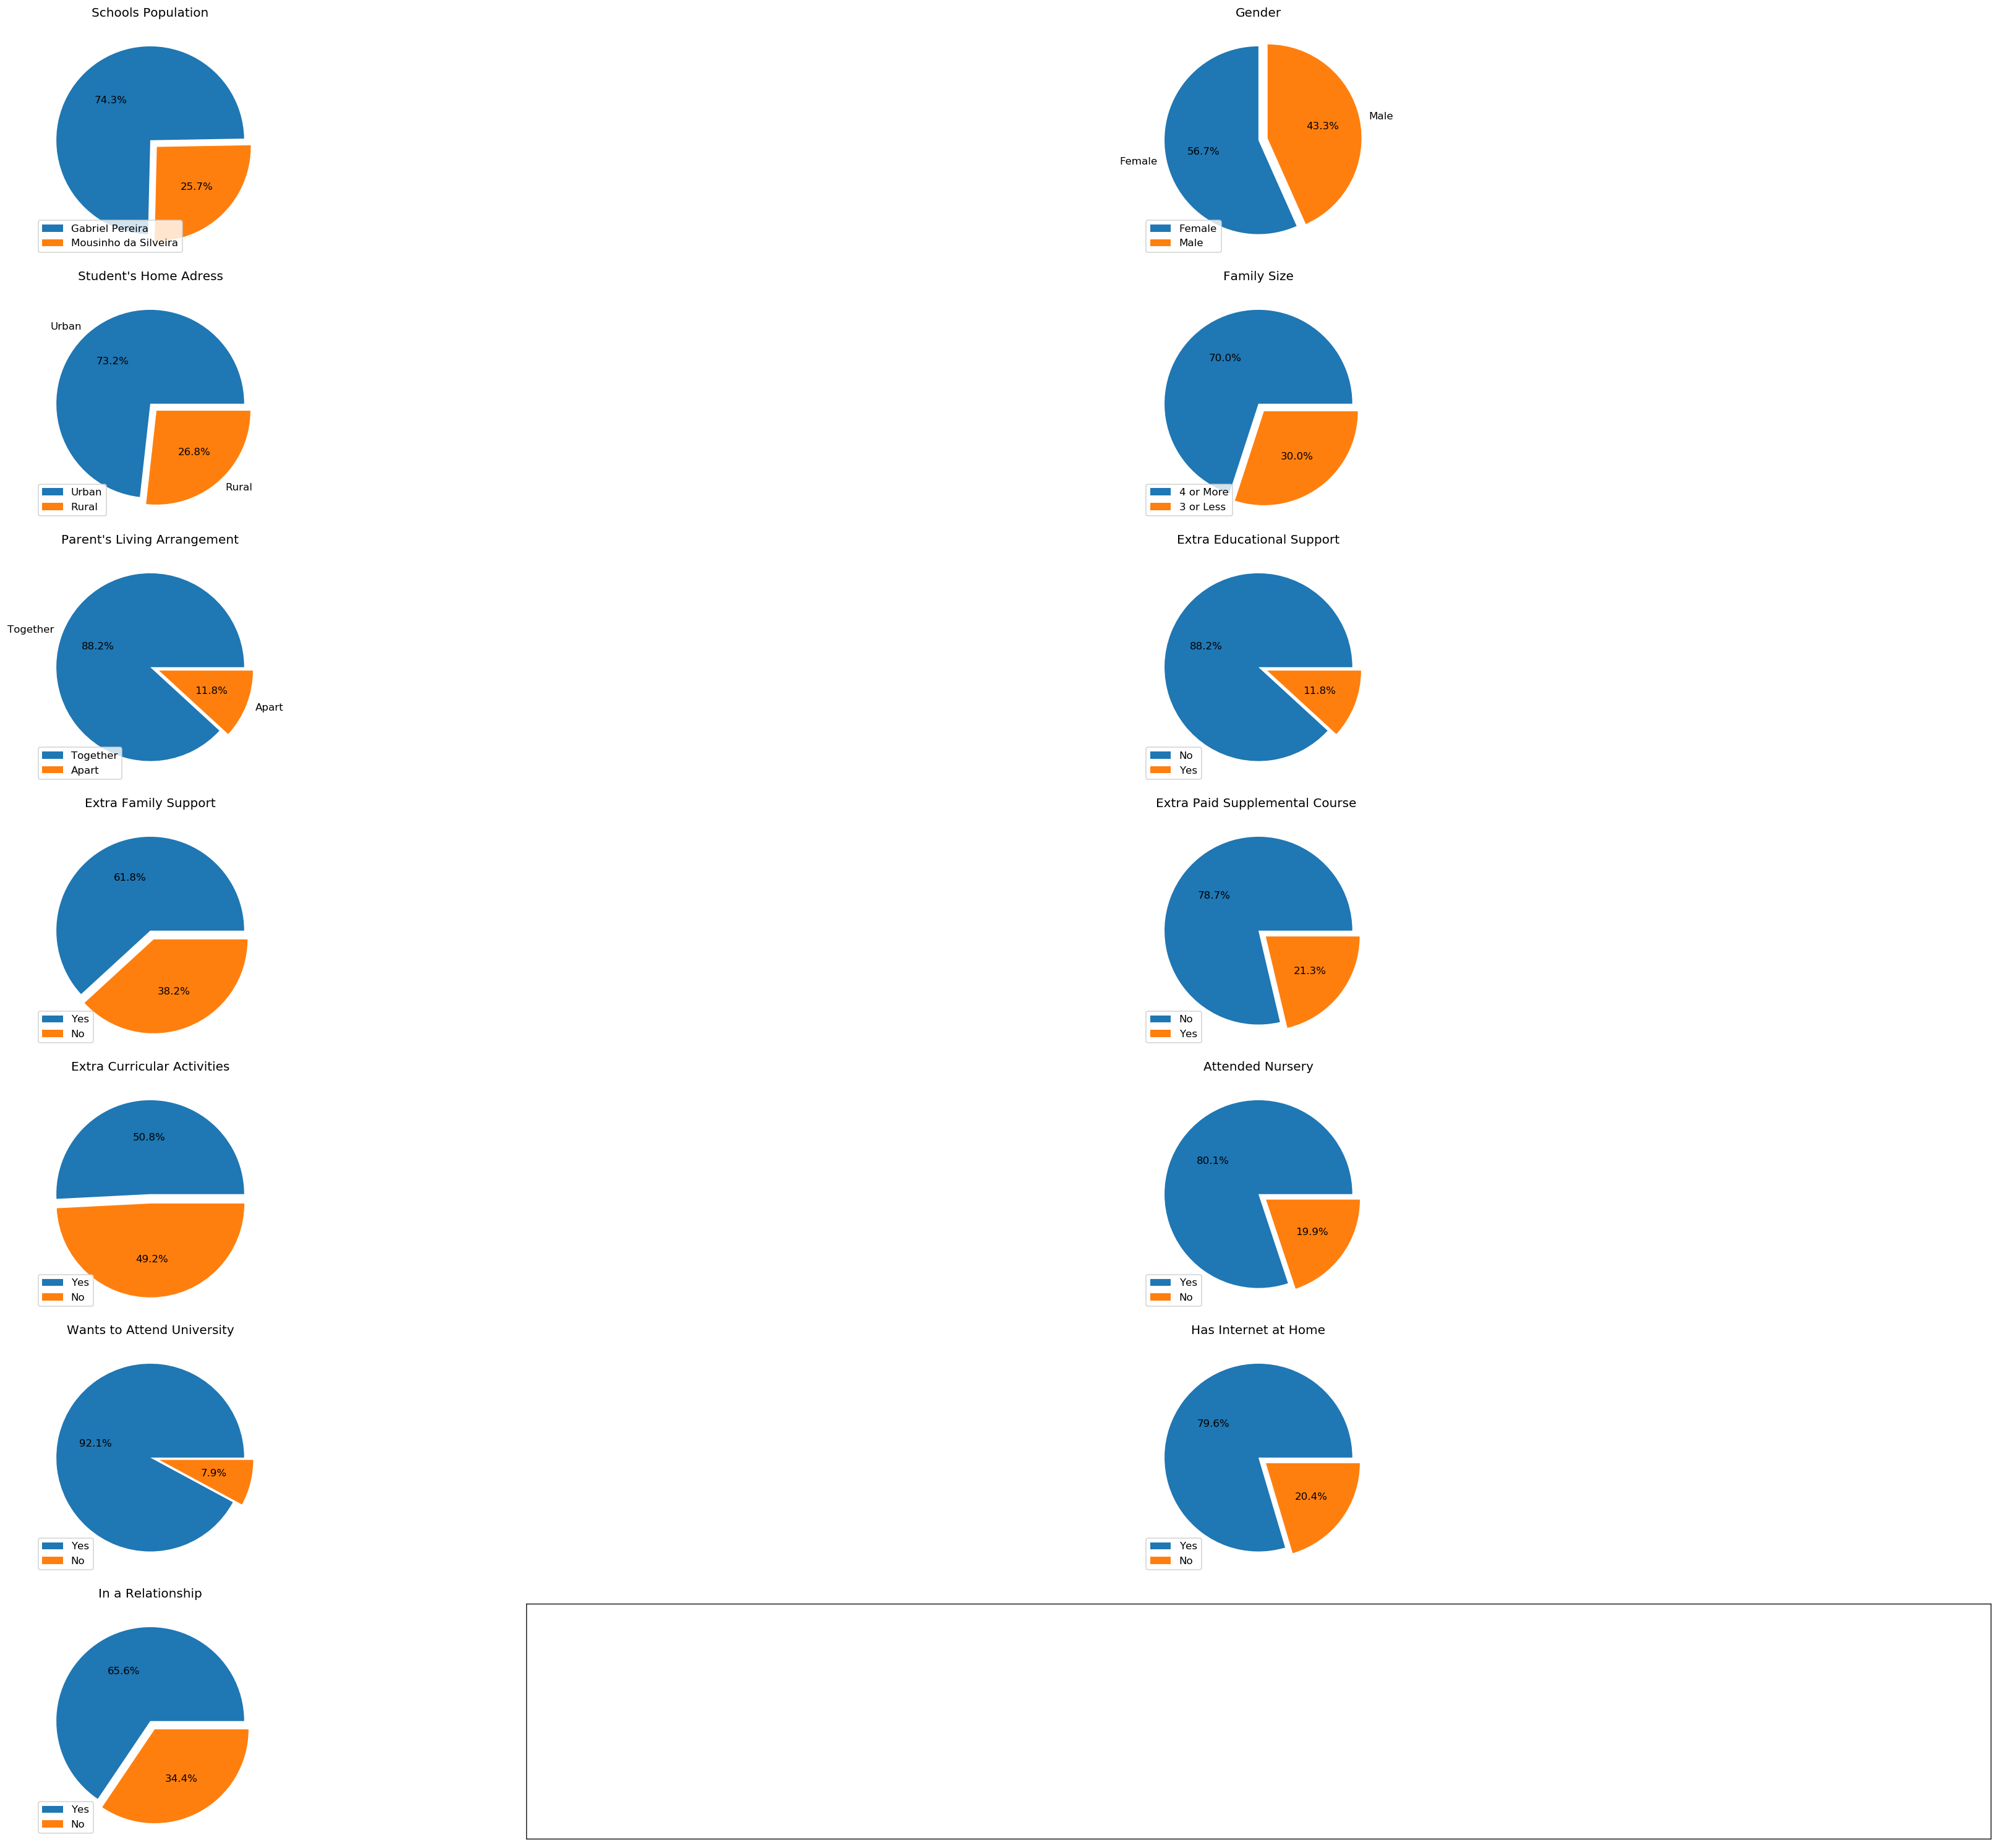

In [63]:
# Create Figure and Subplots
fig, axs = plt.subplots(7 , 2, figsize=(35,25), sharex=True, sharey=True, dpi=120)#, figsize=(25,10), sharey=True, dpi=120

# Plots
axs[0,0].pie(df.school.value_counts(normalize=True),autopct='%1.1f%%', explode = (0,0.1), startangle=1)  
axs[0,0].set_title('Schools Population')
axs[0,0].legend(['Gabriel Pereira','Mousinho da Silveira'],loc=3,)

axs[0,1].pie(df.sex.value_counts(), autopct='%1.1f%%', explode = (0,0.1), labels=('Female','Male'),startangle=90) 
axs[0,1].set_title('Gender')
axs[0,1].legend(['Female', 'Male'], loc=3)

axs[1,0].pie(df.address.value_counts(), autopct='%1.1f%%', labels=('Urban', 'Rural'),explode = (0,0.1))
axs[1,0].set_title("Student's Home Adress")
axs[1,0].legend(['Urban','Rural'],loc=3)


axs[1,1].pie(df.famsize.value_counts(), autopct= '%1.1f%%',explode = (0,0.1))
axs[1,1].set_title("Family Size")
axs[1,1].legend(['4 or More','3 or Less'],loc=3)

axs[2,0].pie(df.Pstatus.value_counts(), autopct='%1.1f%%', labels=('Together', 'Apart'),explode = (0,0.1))
axs[2,0].set_title("Parent's Living Arrangement")
axs[2,0].legend(['Together','Apart'],loc=3)

axs[2,1].pie(df.schoolsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[2,1].set_title("Extra Educational Support")
axs[2,1].legend(['No', 'Yes'],loc=3)

axs[3,0].pie(df.famsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,0].set_title("Extra Family Support")
axs[3,0].legend(['Yes', 'No'],loc=3)

axs[3,1].pie(df.paid.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,1].set_title("Extra Paid Supplemental Course ")
axs[3,1].legend(['No', 'Yes',],loc=3)

axs[4,0].pie(df.activities.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,0].set_title("Extra Curricular Activities")
axs[4,0].legend(['Yes', 'No'],loc=3)

axs[4,1].pie(df.nursery.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,1].set_title("Attended Nursery")
axs[4,1].legend(['Yes', 'No',],loc=3)


axs[5,0].pie(df.higher.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,0].set_title("Wants to Attend University")
axs[5,0].legend(['Yes', 'No'],loc=3)

axs[5,1].pie(df.internet.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,1].set_title("Has Internet at Home")
axs[5,1].legend(['Yes', 'No',],loc=3)

axs[6,0].pie(df.romantic.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[6,0].set_title("In a Relationship")
axs[6,0].legend(['Yes', 'No'],loc=3)
# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

We can see that some binary categories are extremely inbalanced.  The most lopsided binary feature, 'higher', should be dropped.

In [11]:
df.drop(['higher'], axis=1, inplace=True)

In [65]:
df.schoolsup.value_counts()

no     873
yes    117
Name: schoolsup, dtype: int64

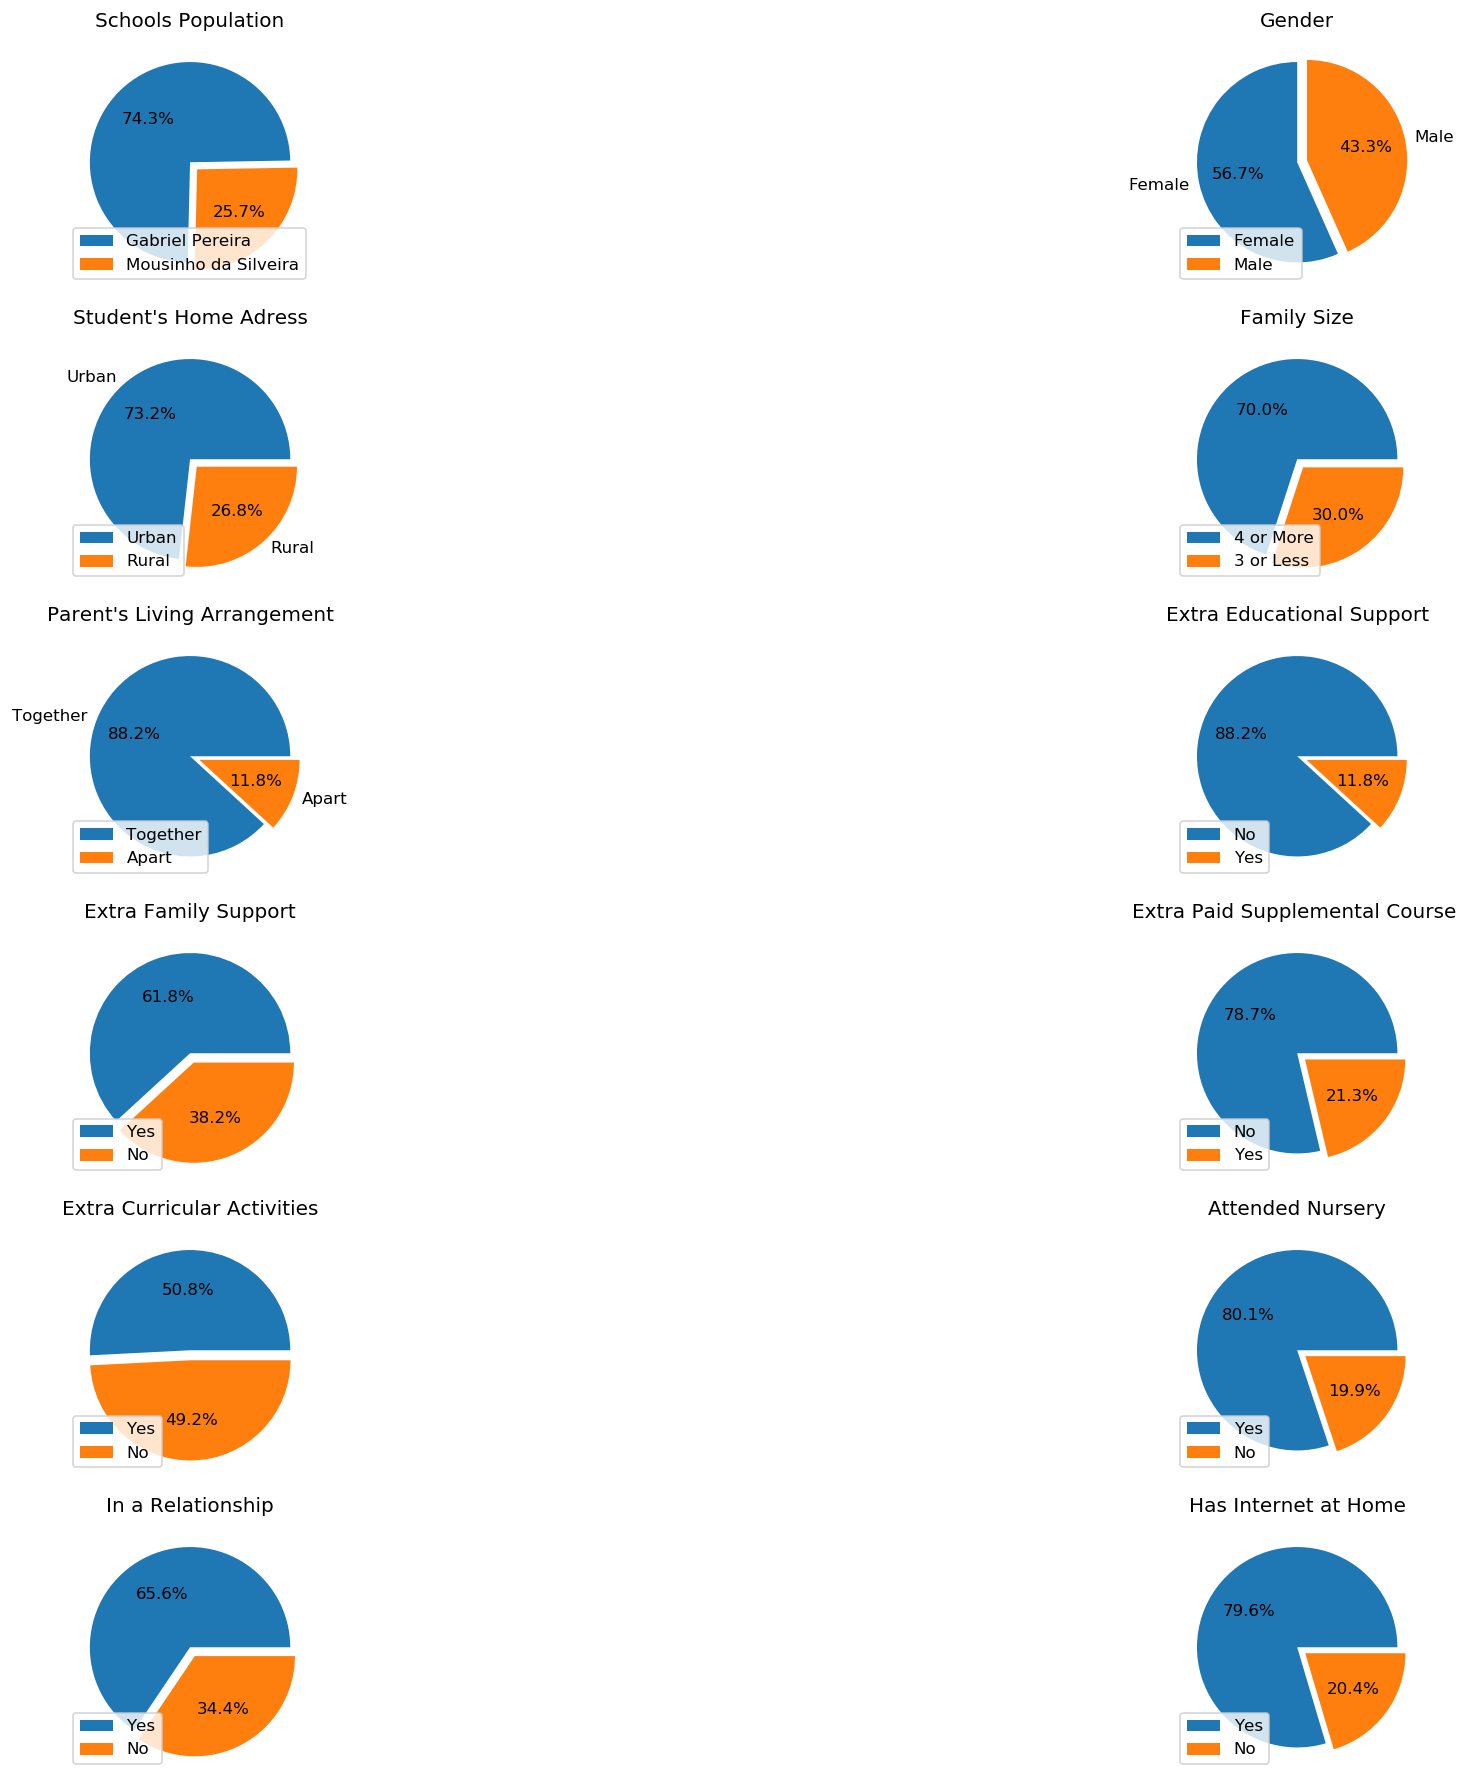

In [66]:
# Create Figure and Subplots
fig, axs = plt.subplots(6 , 2, figsize=(25,15), sharex=True, sharey=True, dpi=120)#, figsize=(25,10), sharey=True, dpi=120

# Plots
axs[0,0].pie(df.school.value_counts(normalize=True),autopct='%1.1f%%', explode = (0,0.1), startangle=1)  
axs[0,0].set_title('Schools Population')
axs[0,0].legend(['Gabriel Pereira','Mousinho da Silveira'],loc=3,)

axs[0,1].pie(df.sex.value_counts(), autopct='%1.1f%%', explode = (0,0.1), labels=('Female','Male'),startangle=90) 
axs[0,1].set_title('Gender')
axs[0,1].legend(['Female', 'Male'], loc=3)

axs[1,0].pie(df.address.value_counts(), autopct='%1.1f%%', labels=('Urban', 'Rural'),explode = (0,0.1))
axs[1,0].set_title("Student's Home Adress")
axs[1,0].legend(['Urban','Rural'],loc=3)


axs[1,1].pie(df.famsize.value_counts(), autopct= '%1.1f%%',explode = (0,0.1))
axs[1,1].set_title("Family Size")
axs[1,1].legend(['4 or More','3 or Less'],loc=3)

axs[2,0].pie(df.Pstatus.value_counts(), autopct='%1.1f%%', labels=('Together', 'Apart'),explode = (0,0.1))
axs[2,0].set_title("Parent's Living Arrangement")
axs[2,0].legend(['Together','Apart'],loc=3)

axs[2,1].pie(df.schoolsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[2,1].set_title("Extra Educational Support")
axs[2,1].legend(['No', 'Yes'],loc=3)

axs[3,0].pie(df.famsup.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,0].set_title("Extra Family Support")
axs[3,0].legend(['Yes', 'No'],loc=3)

axs[3,1].pie(df.paid.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[3,1].set_title("Extra Paid Supplemental Course ")
axs[3,1].legend(['No', 'Yes',],loc=3)

axs[4,0].pie(df.activities.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,0].set_title("Extra Curricular Activities")
axs[4,0].legend(['Yes', 'No'],loc=3)

axs[4,1].pie(df.nursery.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[4,1].set_title("Attended Nursery")
axs[4,1].legend(['Yes', 'No',],loc=3)


axs[5,0].pie(df.romantic.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,0].set_title("In a Relationship")
axs[5,0].legend(['Yes', 'No'],loc=3)

axs[5,1].pie(df.internet.value_counts(), autopct='%1.1f%%',explode = (0,0.1))
axs[5,1].set_title("Has Internet at Home")
axs[5,1].legend(['Yes', 'No',],loc=3)

# ax2.yaxis.set_ticks_position('none') 
plt.tight_layout()
plt.show()

In [75]:

grades = np.sort(df['Grade'].value_counts())

In [80]:
import matplotlib.style as style
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

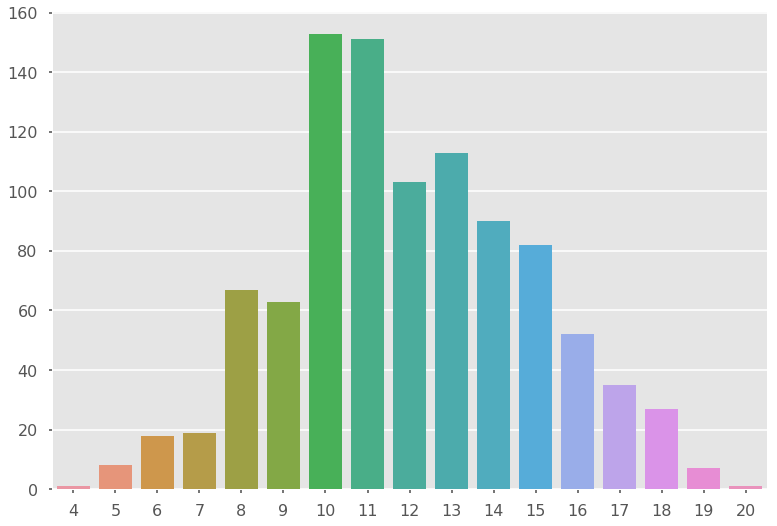

In [86]:
sns.barplot(df['Grade'].value_counts().index, 
        df['Grade'].value_counts().values);


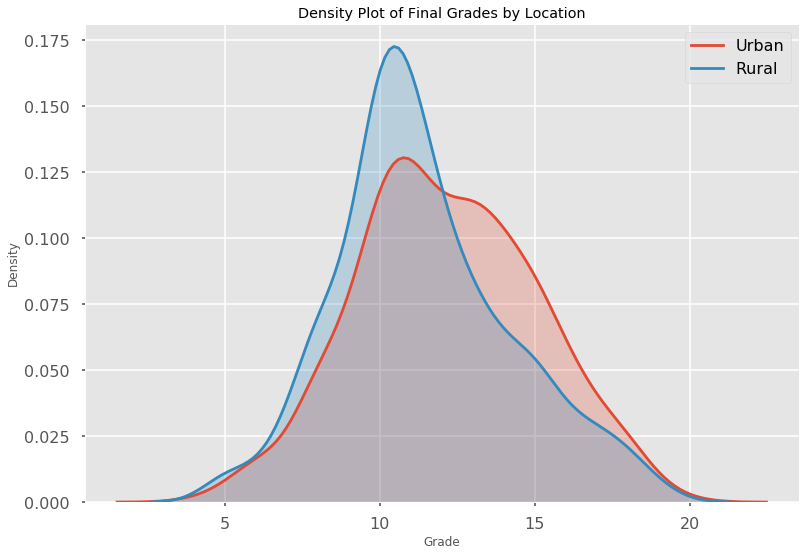

In [87]:
# Grade distribution by address
sns.kdeplot(df.ix[df['address'] == 'U', 'Grade'], label = 'Urban', shade = True)
sns.kdeplot(df.ix[df['address'] == 'R', 'Grade'], label = 'Rural', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Location');

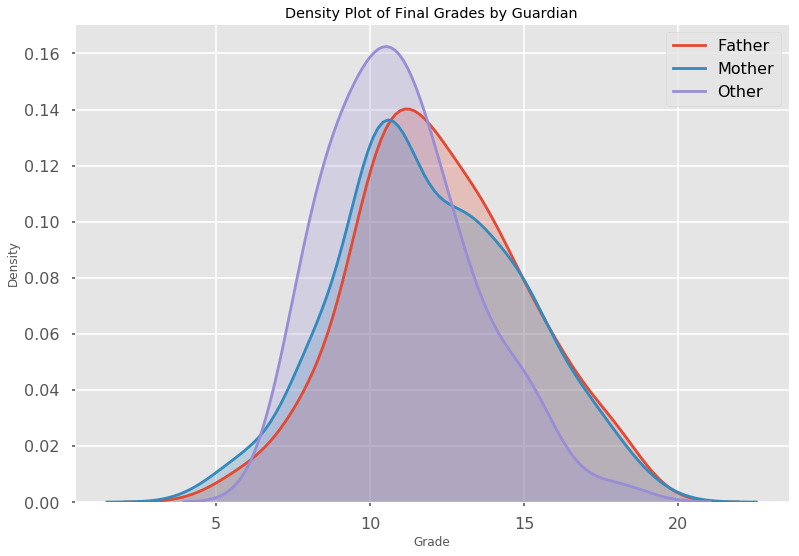

In [88]:
# Grade distribution by Guardian
sns.kdeplot(df.ix[df['guardian'] == 'father', 'Grade'], label = 'Father', shade = True)
sns.kdeplot(df.ix[df['guardian'] == 'mother', 'Grade'], label = 'Mother', shade = True)
sns.kdeplot(df.ix[df['guardian'] == 'other', 'Grade'], label = 'Other', shade = True)
plt.xlabel('Grade'); plt.ylabel('Density'); plt.title('Density Plot of Final Grades by Guardian');

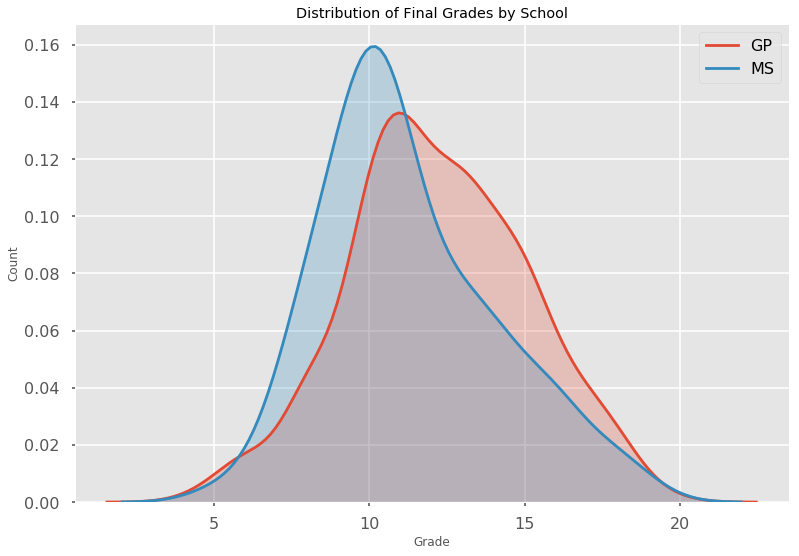

In [89]:
# Grade distribution by school
sns.kdeplot(df.ix[df['school'] == 'GP', 'Grade'], label = 'GP', shade = True)
sns.kdeplot(df.ix[df['school'] == 'MS', 'Grade'], label = 'MS', shade = True)
plt.xlabel('Grade'); plt.ylabel('Count'); plt.title('Distribution of Final Grades by School');

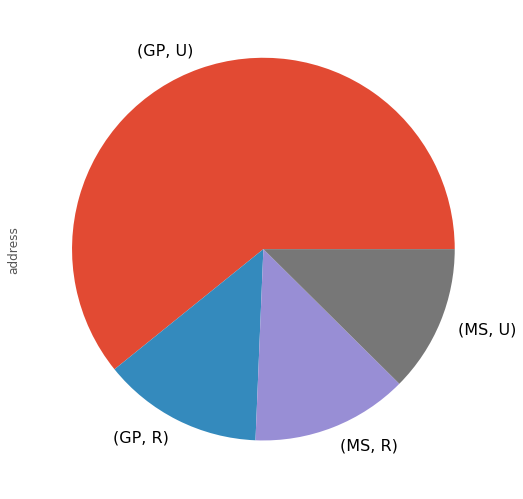

In [100]:
# Look at distribution of schools by address
schools = df.groupby(['school'])['address'].value_counts()
schools.plot(kind='pie');

In [101]:
# Calculate percentile for grades
df['percentile'] = df['Grade'].apply(lambda x: percentileofscore(df['Grade'], x))

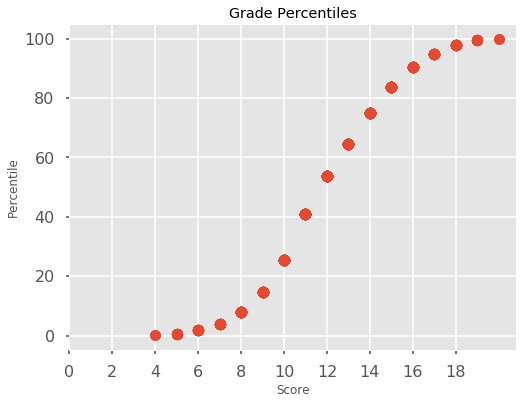

In [102]:
# Plot percentiles for grades
plt.figure(figsize = (8, 6))
plt.plot(df['Grade'], df['percentile'], 'o')
plt.xticks(range(0, 20, 2), range(0, 20, 2))
plt.xlabel('Score'); plt.ylabel('Percentile'); plt.title('Grade Percentiles');

In [103]:
print('50th percentile score:', np.min(df.loc[df['percentile'] > 50, 'Grade']))
print('Minimum Score needed for 90th percentile:', np.min(df.loc[df['percentile'] > 90, 'Grade']))

50th percentile score: 12
Minimum Score needed for 90th percentile: 16


In [104]:
# Correlations of numerical values to final grade (target variable)
df.corr()['Grade'].sort_values()

failures     -0.347400
absences     -0.222513
Walc         -0.184069
Dalc         -0.172465
goout        -0.130908
traveltime   -0.105965
health       -0.090250
age          -0.079651
freetime     -0.075042
famrel        0.056938
Fedu          0.171836
studytime     0.190791
Medu          0.225464
G1            0.880554
G2            0.952330
percentile    0.983028
Grade         1.000000
Name: Grade, dtype: float64

In [105]:
# Select only categorical variables
category_df = df.select_dtypes('object')
# One hot encode the variables
dummy_df = pd.get_dummies(category_df, drop_first=True)
# Put the grade back in the dataframe
dummy_df['Grade'] = df['Grade']
dummy_df.head()

,school_MS,sex_M,address_U,famsize_LE3,Pstatus_T,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_health,...,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes,Grade
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,6
1,0,0,1,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,6
2,0,0,1,1,1,0,0,0,0,0,...,0,1,0,1,0,1,1,1,0,10
3,0,0,1,0,1,1,0,0,0,0,...,0,0,1,1,1,1,1,1,1,15
4,0,0,1,0,1,0,1,0,0,0,...,0,0,1,1,0,1,1,0,0,10


In [106]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['Grade'].sort_values()

schoolsup_yes       -0.163703
school_MS           -0.142174
paid_yes            -0.093390
guardian_other      -0.089417
Mjob_other          -0.073283
reason_other        -0.055022
romantic_yes        -0.045010
Fjob_other          -0.043343
sex_M               -0.039950
Fjob_services       -0.032672
famsup_yes          -0.025364
Pstatus_T           -0.013773
guardian_mother     -0.000792
Fjob_health          0.013425
reason_home          0.021770
famsize_LE3          0.023633
Mjob_services        0.039977
nursery_yes          0.043787
activities_yes       0.067557
Mjob_health          0.106690
Mjob_teacher         0.109775
internet_yes         0.112554
address_U            0.117011
reason_reputation    0.122847
Fjob_teacher         0.154678
higher_yes           0.246184
Grade                1.000000
Name: Grade, dtype: float64

In [107]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'Grade', 'percentile'],
      dtype='object')

In [108]:
# Takes in a dataframe, finds the most correlated variables with the
# grade and returns training and testing datasets
def format_data(df):
    # Targets are final grade of student
    labels = df['Grade']
    
    # Drop the school and the grades from features
    df = df.drop(columns=['school', 'G1', 'G2', 'percentile'])
    
    # One-Hot Encoding of Categorical Variables
    df = pd.get_dummies(df, drop_first=True)
    
    # Find correlations with the Grade
    most_correlated = df.corr().abs()['Grade'].sort_values(ascending=False)
    
    # Maintain the top 6 most correlation features with Grade
    most_correlated = most_correlated[:7]
    
    df = df.ix[:, most_correlated.index]
#    df = df.drop(columns = 'higher_no')
    
    # Split into training/testing sets with 25% split
    X_train, X_test, y_train, y_test = train_test_split(df, labels, 
                                                        test_size = 0.25,
                                                        random_state=42)
    
    return X_train, X_test, y_train, y_test

In [139]:
X_train, X_test, y_train, y_test = format_data(df)
X_train.sample(5)

,Grade,failures,higher_yes,Medu,absences,studytime,Walc
309,14,0,1,4,4,2,3
272,15,0,1,1,2,3,1
259,10,0,1,1,10,3,2
136,11,0,1,2,4,1,1
323,10,0,1,4,0,1,2


In [110]:
# Rename variables in train and test
X_train = X_train.rename(columns={'Medu': 'mother_edu',
                                  'Fedu': 'father_edu'})

X_test = X_test.rename(columns={'Medu': 'mother_edu',
                                'Fedu': 'father_edu'})


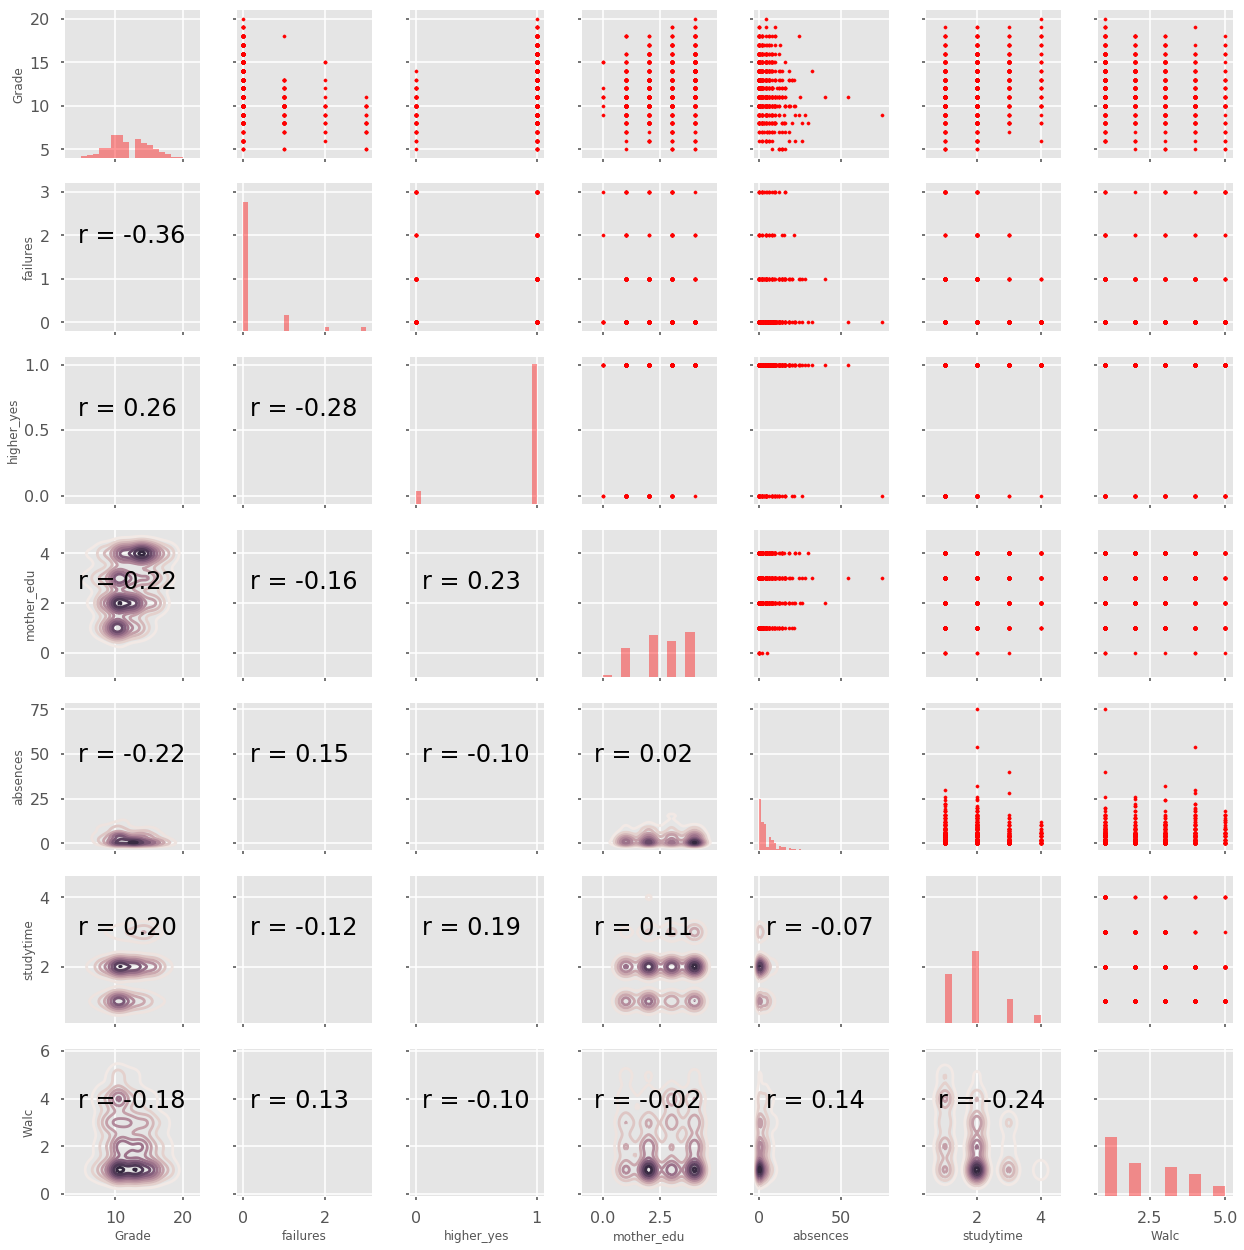

In [111]:
# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(X_train)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);


In [112]:

# Create relation to the median grade column
X_plot = X_train.copy()
X_plot['relation_median'] = (X_plot['Grade'] >= 12)
X_plot['relation_median'] = X_plot['relation_median'].replace({True: 'above', False: 'below'})
X_plot = X_plot.drop(columns='Grade')

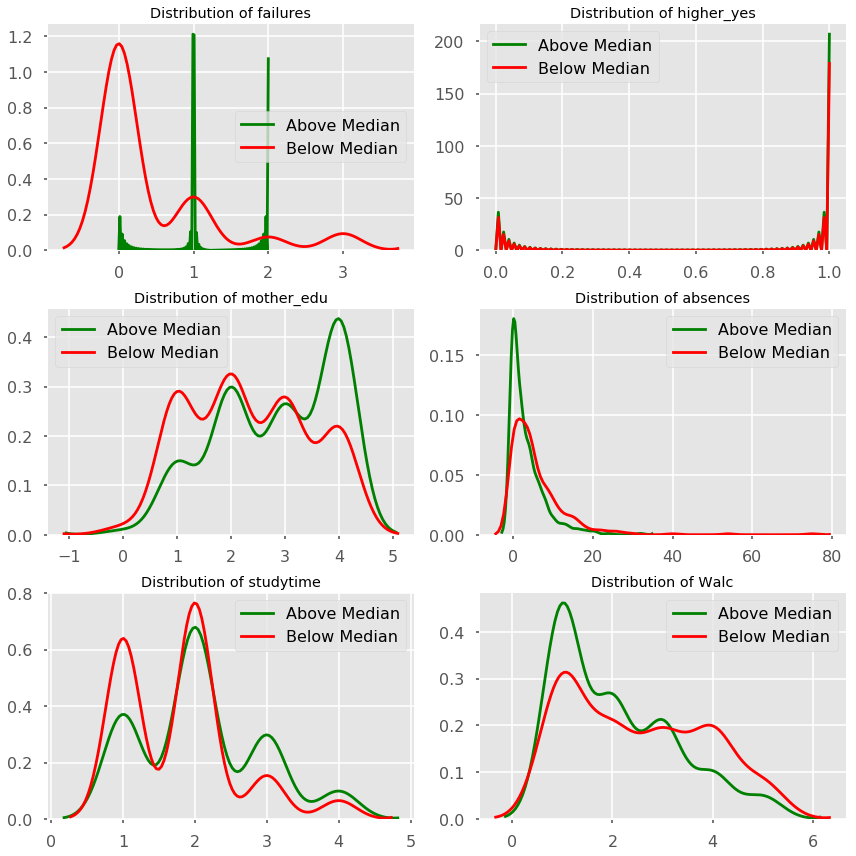

In [113]:
plt.figure(figsize=(12, 12))
# Plot the distribution of each variable colored
# by the relation to the median grade
for i, col in enumerate(X_plot.columns[:-1]):
    plt.subplot(3, 2, i + 1)
    subset_above = X_plot[X_plot['relation_median'] == 'above']
    subset_below = X_plot[X_plot['relation_median'] == 'below']
    sns.kdeplot(subset_above[col], label = 'Above Median', color = 'green')
    sns.kdeplot(subset_below[col], label = 'Below Median', color = 'red')
    plt.legend(); plt.title('Distribution of %s' % col)
    
plt.tight_layout()

In [114]:
# Calculate mae and rmse
def evaluate_predictions(predictions, true):
    mae = np.mean(abs(predictions - true))
    rmse = np.sqrt(np.mean((predictions - true) ** 2))
    
    return mae, rmse

Establish Naive Baseline

In [115]:
# Naive baseline is the median
median_pred = X_train['Grade'].median()
median_preds = [median_pred for _ in range(len(X_test))]
true = X_test['Grade']

In [116]:


# Display the naive baseline metrics
mb_mae, mb_rmse = evaluate_predictions(median_preds, true)
print('Median Baseline  MAE: {:.4f}'.format(mb_mae))
print('Median Baseline RMSE: {:.4f}'.format(mb_rmse))



Median Baseline  MAE: 2.2984
Median Baseline RMSE: 2.8554


Standard Machine Learning Models

In [117]:
# Evaluate several ml models by training on training set and testing on testing set
def evaluate(X_train, X_test, y_train, y_test):
    # Names of models
    model_name_list = ['Linear Regression', 'ElasticNet Regression',
                      'Random Forest', 'Extra Trees', 'SVM',
                       'Gradient Boosted', 'Baseline']
    X_train = X_train.drop(columns='Grade')
    X_test = X_test.drop(columns='Grade')
    
    # Instantiate the models
    model1 = LinearRegression()
    model2 = ElasticNet(alpha=1.0, l1_ratio=0.5)
    model3 = RandomForestRegressor(n_estimators=50)
    model4 = ExtraTreesRegressor(n_estimators=50)
    model5 = SVR(kernel='rbf', degree=3, C=1.0, gamma='auto')
    model6 = GradientBoostingRegressor(n_estimators=20)
    
    # Dataframe for results
    results = pd.DataFrame(columns=['mae', 'rmse'], index = model_name_list)
    
    # Train and predict with each model
    for i, model in enumerate([model1, model2, model3, model4, model5, model6]):
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        
        # Metrics
        mae = np.mean(abs(predictions - y_test))
        rmse = np.sqrt(np.mean((predictions - y_test) ** 2))
        
        # Insert results into the dataframe
        model_name = model_name_list[i]
        results.ix[model_name, :] = [mae, rmse]
    
    # Median Value Baseline Metrics
    baseline = np.median(y_train)
    baseline_mae = np.mean(abs(baseline - y_test))
    baseline_rmse = np.sqrt(np.mean((baseline - y_test) ** 2))
    
    results.ix['Baseline', :] = [baseline_mae, baseline_rmse]
    
    return results

In [118]:
results = evaluate(X_train, X_test, y_train, y_test)

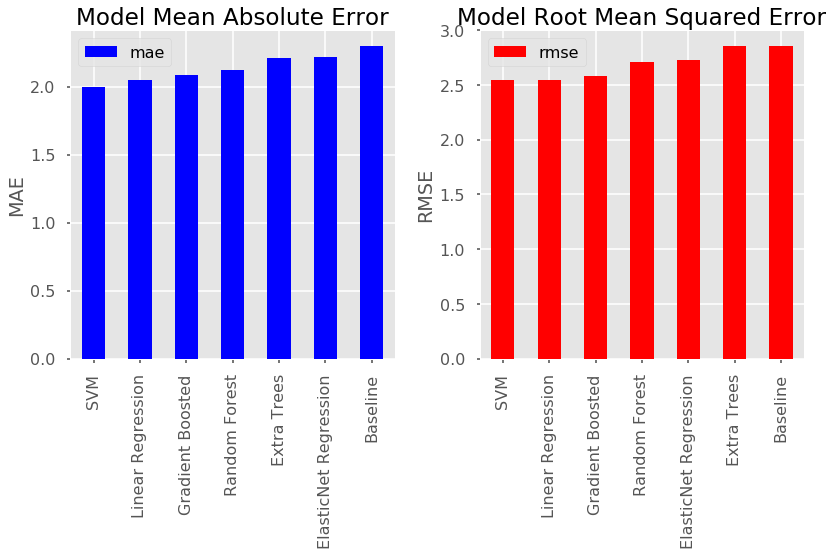

In [119]:
figsize(12, 8)
matplotlib.rcParams['font.size'] = 16
# Root mean squared error
ax =  plt.subplot(1, 2, 1)
results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'b', ax = ax)
plt.title('Model Mean Absolute Error'); plt.ylabel('MAE');

# Median absolute percentage error
ax = plt.subplot(1, 2, 2)
results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'r', ax = ax)
plt.title('Model Root Mean Squared Error'); plt.ylabel('RMSE');

plt.tight_layout()

In [120]:
results

,mae,rmse
Linear Regression,2.05116,2.54302
ElasticNet Regression,2.21774,2.72956
Random Forest,2.12219,2.71222
Extra Trees,2.21032,2.85407
SVM,1.99576,2.54255
Gradient Boosted,2.08351,2.58409
Baseline,2.29839,2.85539


In [124]:
print('The Support Vector Machine is {:0.2f}% better than the baseline.'.format(
    (100 * abs(results.loc['SVM', 'mae'] - results.loc['Baseline', 'mae'])) / results.loc['Baseline', 'mae']))

The Support Vector Machine is 13.17% better than the baseline.


In [125]:
#Fomula from Ordianry Least Squares Linrear Regression
lr = LinearRegression()
lr.fit(X_train.drop(columns='Grade'), y_train)

ols_formula = 'Grade = %0.2f +' % lr.intercept_
for i, col in enumerate(X_train.columns[1:]):
    ols_formula += ' %0.2f * %s +' % (lr.coef_[i], col)
    
' '.join(ols_formula.split(' ')[:-1])


'Grade = 10.35 + -1.17 * failures + 1.17 * higher_yes + 0.37 * mother_edu + -0.07 * absences + 0.36 * studytime + -0.19 * Walc'

In [126]:
# implementing Baysian Statistics (Linear Regression)


# Formula for Bayesian Linear Regression (follows R formula syntax
formula = 'Grade ~ ' + ' + '.join(['%s' % variable for variable in X_train.columns[1:]])
formula

'Grade ~ failures + higher_yes + mother_edu + absences + studytime + Walc'

In [128]:
# Context for the model
with pm.Model() as normal_model:
    
    # The prior for the model parameters will be a normal distribution
    family = pm.glm.families.Normal()
    
    # Creating the model requires a formula and data (and optionally a family)
    pm.GLM.from_formula(formula, data = X_train, family = family)
    
    # Perform Markov Chain Monte Carlo sampling
    normal_trace = pm.sample(draws=2000, chains = 2, tune = 1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [sd, Walc, studytime, absences, mother_edu, higher_yes, failures, Intercept]
Sampling 2 chains: 100%|██████████| 6000/6000 [00:27<00:00, 218.03draws/s]


In [129]:


# Shows the trace with a vertical line at the mean of the trace
def plot_trace(trace):
    # Traceplot with vertical lines at the mean value
    ax = pm.traceplot(trace, figsize=(14, len(trace.varnames)*1.8),
                      lines={k: v['mean'] for k, v in pm.summary(trace).iterrows()})
    
    matplotlib.rcParams['font.size'] = 16
    
    # Labels with the median value
    for i, mn in enumerate(pm.summary(trace)['mean']):
        ax[i, 0].annotate('{:0.2f}'.format(mn), xy = (mn, 0), xycoords = 'data', size = 8,
                          xytext = (-18, 18), textcoords = 'offset points', rotation = 90,
                          va = 'bottom', fontsize = 'large', color = 'red')



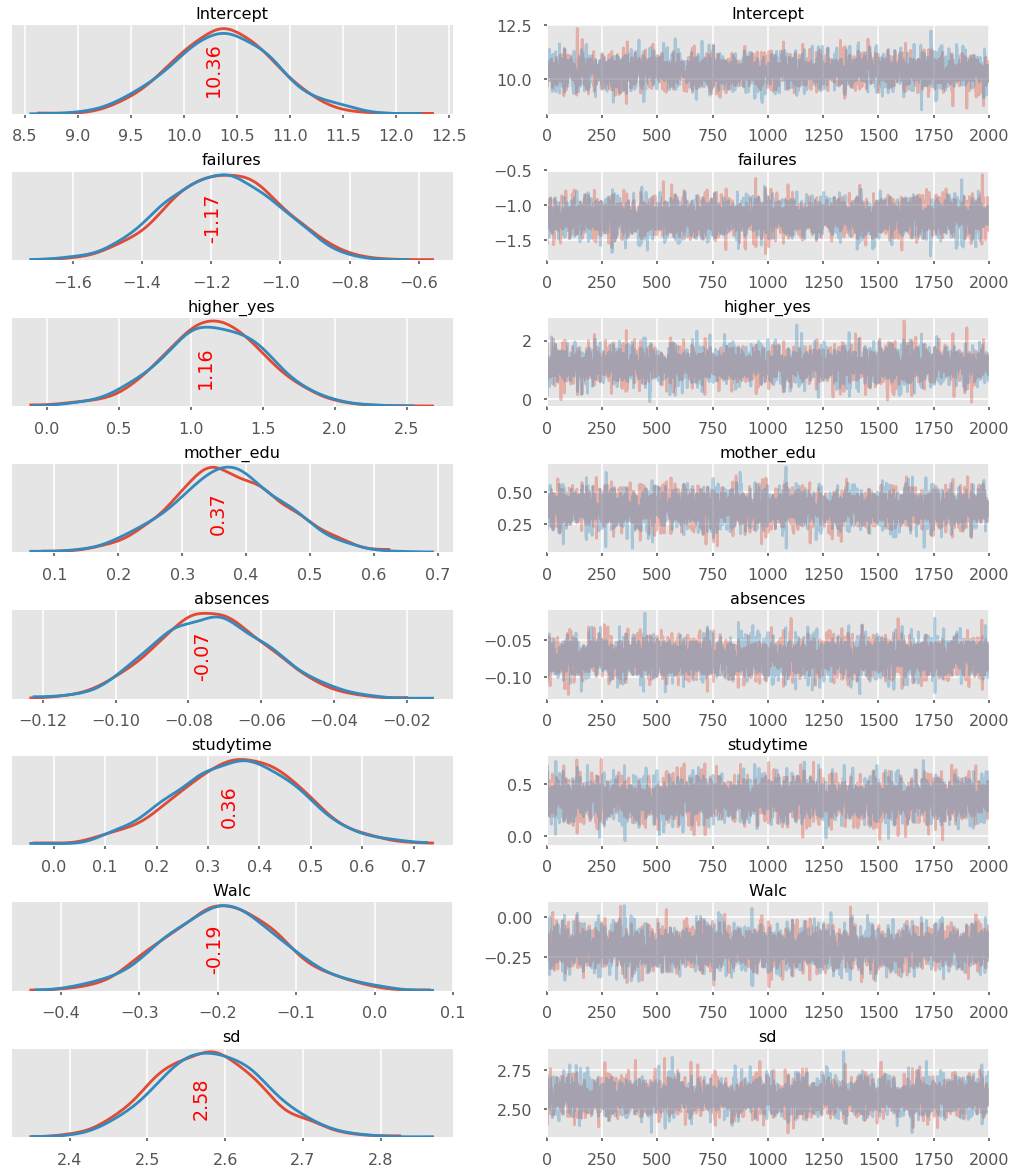

In [130]:
plot_trace(normal_trace);

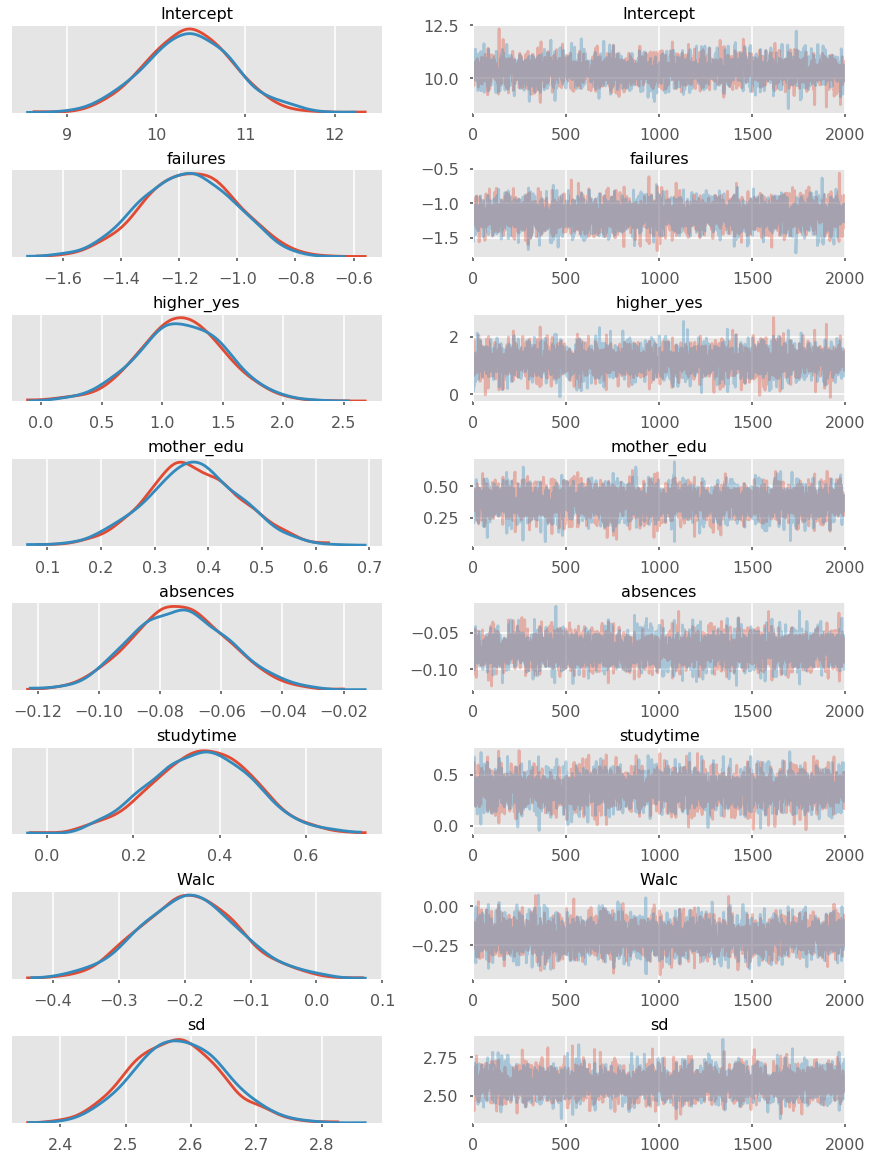

In [131]:
pm.traceplot(normal_trace);

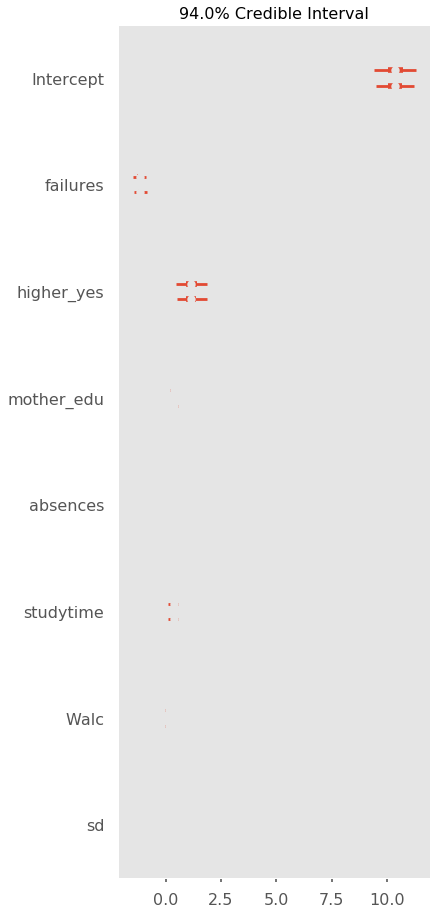

In [140]:
pm.forestplot(normal_trace);

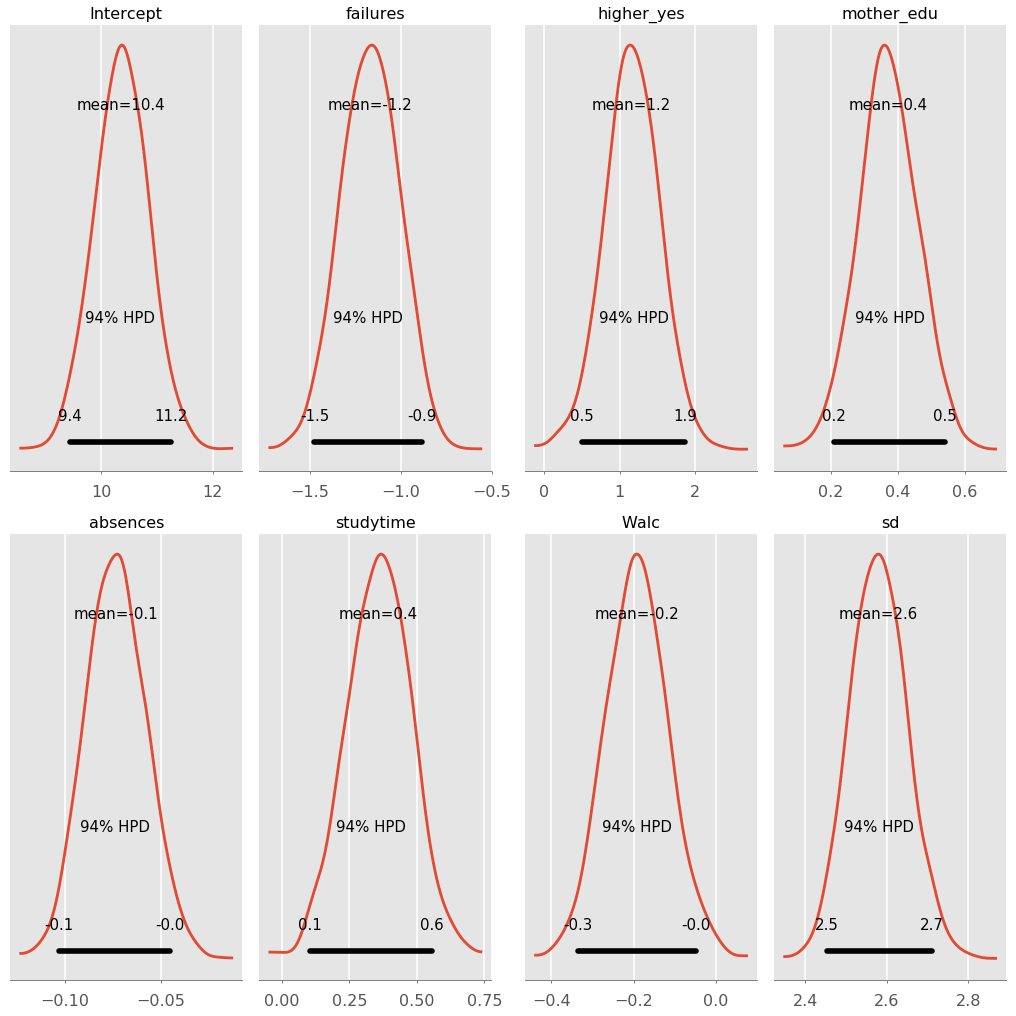

In [141]:
pm.plot_posterior(normal_trace, figsize = (14, 14), text_size=20);

In [134]:
# Print out the mean variable weight from the trace
for variable in normal_trace.varnames:
    print('Variable: {:15} Mean weight in model: {:.4f}'.format(variable, 
                                                                np.mean(normal_trace[variable])))

Variable: Intercept       Mean weight in model: 10.3618
Variable: failures        Mean weight in model: -1.1711
Variable: higher_yes      Mean weight in model: 1.1594
Variable: mother_edu      Mean weight in model: 0.3703
Variable: absences        Mean weight in model: -0.0736
Variable: studytime       Mean weight in model: 0.3582
Variable: Walc            Mean weight in model: -0.1930
Variable: sd_log__        Mean weight in model: 0.9472
Variable: sd              Mean weight in model: 2.5795


In [135]:
pm.summary(normal_trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
Intercept,10.361844,0.483444,0.010260,9.424424,11.314032,2161.837509,0.999826
failures,-1.171081,0.159884,0.002863,-1.497221,-0.884421,3054.673307,1.001855
higher_yes,1.159408,0.363610,0.006143,0.480783,1.913064,2737.807673,0.999814
mother_edu,0.370288,0.087481,0.001464,0.210196,0.553294,3633.804772,0.999766
absences,-0.073633,0.015657,0.000270,-0.102950,-0.042588,3356.582124,0.999831
studytime,0.358238,0.119798,0.002285,0.108040,0.578015,2802.763856,1.000005
Walc,-0.193045,0.075639,0.001309,-0.335102,-0.034785,3295.128868,0.999754
sd,2.579457,0.069142,0.001221,2.442043,2.709698,3083.885980,1.002514


In [136]:
model_formula = 'Grade = '
for variable in normal_trace.varnames:
    model_formula += ' %0.2f * %s +' % (np.mean(normal_trace[variable]), variable)

' '.join(model_formula.split(' ')[:-1])

'Grade =  10.36 * Intercept + -1.17 * failures + 1.16 * higher_yes + 0.37 * mother_edu + -0.07 * absences + 0.36 * studytime + -0.19 * Walc + 0.95 * sd_log__ + 2.58 * sd'

In [137]:
# Evalute the MCMC trace and compare to ml models
def evaluate_trace(trace, X_train, X_test, y_train, y_test, model_results):
    
    # Dictionary of all sampled values for each parameter
    var_dict = {}
    for variable in trace.varnames:
        var_dict[variable] = trace[variable]
        
    # Results into a dataframe
    var_weights = pd.DataFrame(var_dict)
    
    # Means for all the weights
    var_means = var_weights.mean(axis=0)
    
    # Create an intercept column
    X_test['Intercept'] = 1
    
    # Align names of the test observations and means
    names = X_test.columns[1:]
    X_test = X_test.ix[:, names]
    var_means = var_means[names]
    
    # Calculate estimate for each test observation using the average weights
    results = pd.DataFrame(index = X_test.index, columns = ['estimate'])

    for row in X_test.iterrows():
        results.ix[row[0], 'estimate'] = np.dot(np.array(var_means), np.array(row[1]))
        
    # Metrics 
    actual = np.array(y_test)
    errors = results['estimate'] - actual
    mae = np.mean(abs(errors))
    rmse = np.sqrt(np.mean(errors ** 2))
    
    print('Model  MAE: {:.4f}\nModel RMSE: {:.4f}'.format(mae, rmse))
    
    # Add the results to the comparison dataframe
    model_results.ix['Bayesian LR', :] = [mae, rmse]
    
    plt.figure(figsize=(12, 8))
    
    # Plot median absolute percentage error of all models
    ax = plt.subplot(1, 2, 1)
    model_results.sort_values('mae', ascending = True).plot.bar(y = 'mae', color = 'r', ax = ax)
    plt.title('Model Mean Absolute Error Comparison'); plt.ylabel('MAE'); 
    plt.tight_layout()
    
    # Plot root mean squared error of all models
    ax = plt.subplot(1, 2, 2)
    model_results.sort_values('rmse', ascending = True).plot.bar(y = 'rmse', color = 'b', ax = ax)
    plt.title('Model RMSE Comparison'); plt.ylabel('RMSE')
    
    return model_results

Model  MAE: 2.1440
Model RMSE: 2.6518


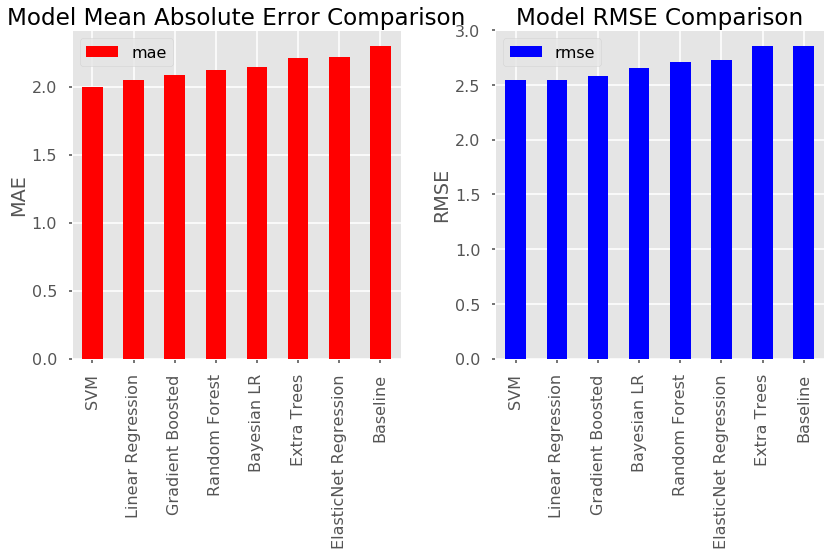

In [138]:
all_model_results = evaluate_trace(normal_trace, X_train, X_test, y_train, y_test, results)

In [142]:
all_model_results

,mae,rmse
Linear Regression,2.05116,2.54302
ElasticNet Regression,2.21774,2.72956
Random Forest,2.12219,2.71222
Extra Trees,2.21032,2.85407
SVM,1.99576,2.54255
Gradient Boosted,2.08351,2.58409
Baseline,2.29839,2.85539
Bayesian LR,2.14401,2.65181


In [143]:
from keras.models import Sequential

model = Sequential()



Using TensorFlow backend.


ImportError: cannot import name 'abs'